## Import Libraries and load Data

In [95]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [96]:
#from yellowbrick.cluster import KElbowVisualizer

In [97]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [98]:
df.dropna(inplace=True)

In [99]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [100]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [101]:
#drop "ID","Z_CostContact" and "Z_Revenue" column
df = df.drop(columns=["id", "z_costcontact","z_revenue" ])

### create new column "age"

In [102]:
df["age"] = 2014 - df["year_birth"]

In [103]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [104]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [105]:
max(df["age"])

121

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

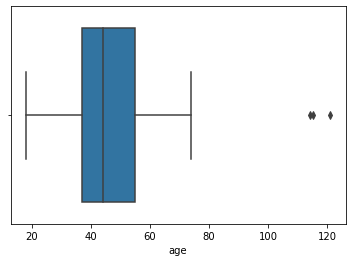

In [106]:
sns.boxplot(df["age"])

In [107]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [108]:
df.drop([239], axis=0, inplace=True)

In [109]:
max(df["age"])

115

In [110]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [111]:
df.drop([339], axis=0, inplace=True)

In [112]:
max(df["age"])

114

In [113]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [114]:
df.drop([192], axis=0, inplace=True)

In [115]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [116]:
type(df["dt_customer"][0])

str

def date(datestr="", format="%d-%m-%Y"):
    from datetime import datetime
    if not datestr:
        return datetime.today().date()
    return datetime.strptime(datestr, format).date()

In [117]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   education            2213 non-null   object        
 1   marital_status       2213 non-null   object        
 2   income               2213 non-null   float64       
 3   kidhome              2213 non-null   int64         
 4   teenhome             2213 non-null   int64         
 5   dt_customer          2213 non-null   datetime64[ns]
 6   recency              2213 non-null   int64         
 7   mntwines             2213 non-null   int64         
 8   mntfruits            2213 non-null   int64         
 9   mntmeatproducts      2213 non-null   int64         
 10  mntfishproducts      2213 non-null   int64         
 11  mntsweetproducts     2213 non-null   int64         
 12  mntgoldprods         2213 non-null   int64         
 13  numdealspurchases    2213 non-nul

In [119]:
max(df["dt_customer"])

Timestamp('2014-06-29 00:00:00')

### create "month" column

In [120]:
#Convert datetime column/series to month
df['month'] = df['dt_customer'].dt.month

In [121]:
df['month']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: month, Length: 2213, dtype: int64

In [122]:
df["month"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [123]:
df["month"]

0       21.0
1        3.0
2       10.0
3        4.0
4        5.0
        ... 
2235    12.0
2236     0.0
2237     5.0
2238     5.0
2239    20.0
Name: month, Length: 2213, dtype: float64

In [124]:
df[["month", "dt_customer"]]

,month,dt_customer
0,21.0,2012-09-04
1,3.0,2014-03-08
2,10.0,2013-08-21
3,4.0,2014-02-10
4,5.0,2014-01-19
...,...,...
2235,12.0,2013-06-13
2236,0.0,2014-06-10
2237,5.0,2014-01-25
2238,5.0,2014-01-24


### clean education column

In [125]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [126]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "Undergraduate"
    elif x in ['Graduation']:
        return "Graduate"
    elif x in ['Master', 'PhD']:
        return "Postgraduate"

In [127]:
df['education'] = list(map(clean_edu, df['education']))

### convert "income" to int

In [128]:
max(df["income"])

666666.0

In [129]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,month
2233,Graduate,Together,666666.0,1,0,2013-06-02,23,9,14,18,...,6,0,0,0,0,0,0,0,37,12.0


In [130]:
df.drop([2233], axis=0, inplace=True)

In [131]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [132]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [133]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,month
2177,Postgraduate,YOLO,48432,0,1,2012-10-18,3,322,3,50,...,8,0,0,0,0,0,0,0,41,20.0
2202,Postgraduate,YOLO,48432,0,1,2012-10-18,3,322,3,50,...,8,0,0,0,0,0,0,1,41,20.0


In [134]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [135]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [136]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "together"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "single"

In [137]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

### new column "children"

In [138]:
#concat "kidhome" and "teenhome" and create new column "children"
df["children"]= df["kidhome"] + df["teenhome"]

In [139]:
#drop "kidhome", "teenhome" columns
df = df.drop(columns=["kidhome","teenhome"])

### concatenate campaigns 

In [140]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [141]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [142]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [143]:
df

,education,marital_status,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,month,children,acc_camp
0,Graduate,single,58138,2012-09-04,58,635,88,546,172,88,...,8,10,4,7,0,1,57,21.0,0,0
1,Graduate,single,46344,2014-03-08,38,11,1,6,2,1,...,1,1,2,5,0,0,60,3.0,2,0
2,Graduate,together,71613,2013-08-21,26,426,49,127,111,21,...,8,2,10,4,0,0,49,10.0,0,0
3,Graduate,together,26646,2014-02-10,26,11,4,20,10,3,...,2,0,4,6,0,0,30,4.0,1,0
4,Postgraduate,together,58293,2014-01-19,94,173,43,118,46,27,...,5,3,6,5,0,0,33,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,together,61223,2013-06-13,46,709,43,182,42,118,...,9,3,4,5,0,0,47,12.0,1,0
2236,Postgraduate,together,64014,2014-06-10,56,406,0,30,0,0,...,8,2,5,7,0,0,68,0.0,3,1
2237,Graduate,single,56981,2014-01-25,91,908,48,217,32,12,...,2,3,13,6,0,0,33,5.0,0,1
2238,Postgraduate,together,69245,2014-01-24,8,428,30,214,80,30,...,6,5,10,3,0,0,58,5.0,1,0


In [144]:
# column "household_size"
# column "total_amount_spent"

### concatenate columns amounts spent 

In [145]:
df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

## plotting

### correlation heatmap

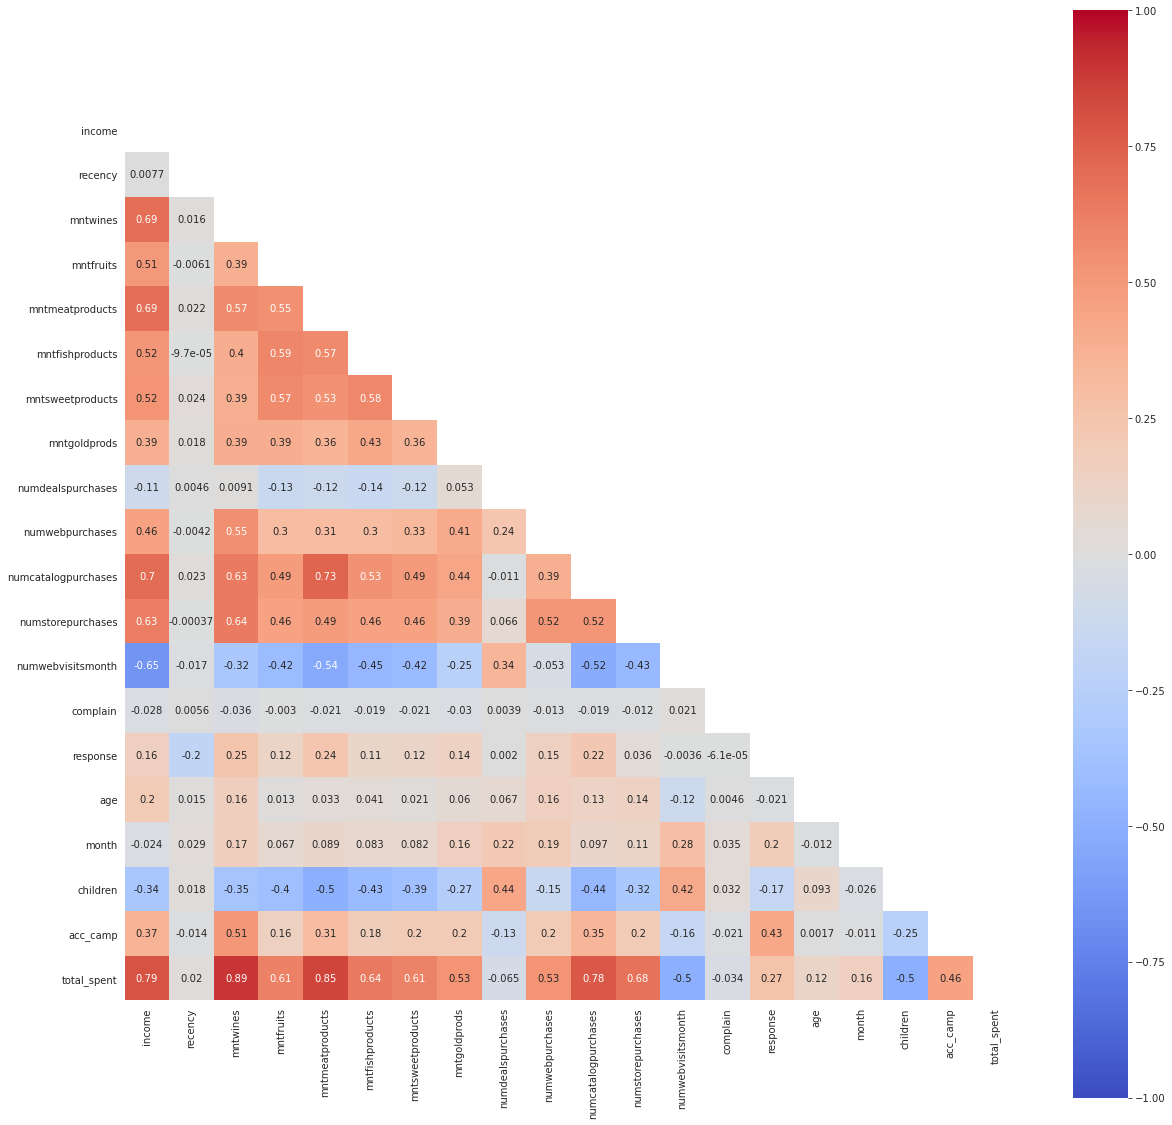

In [146]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### export excel to tableau

In [147]:
df.to_excel(r'df_clean.xlsx', index = False)

In [148]:
df.describe()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,month,children,acc_camp,total_spent
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,51962.002262,49.061086,305.272398,26.350679,167.135747,37.679186,27.068326,43.927602,2.322172,4.085520,2.673756,5.806335,5.319005,0.00905,0.150226,45.090045,11.113122,0.947511,0.298643,607.433937
std,21536.760214,28.923063,337.475234,39.755837,224.328327,54.787459,41.103215,51.730350,1.923693,2.742027,2.928434,3.252405,2.425355,0.09472,0.357374,11.706248,6.633718,0.749803,0.679818,602.760809
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,18.000000,0.000000,0.000000,0.000000,5.000000
25%,35208.500000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.00000,0.000000,37.000000,5.000000,0.000000,0.000000,69.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.00000,0.000000,44.000000,11.000000,1.000000,0.000000,396.500000
75%,68487.000000,74.000000,505.000000,33.000000,232.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.00000,0.000000,55.000000,17.000000,1.000000,0.000000,1048.000000
max,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.00000,1.000000,74.000000,22.000000,3.000000,4.000000,2525.000000


### histograms

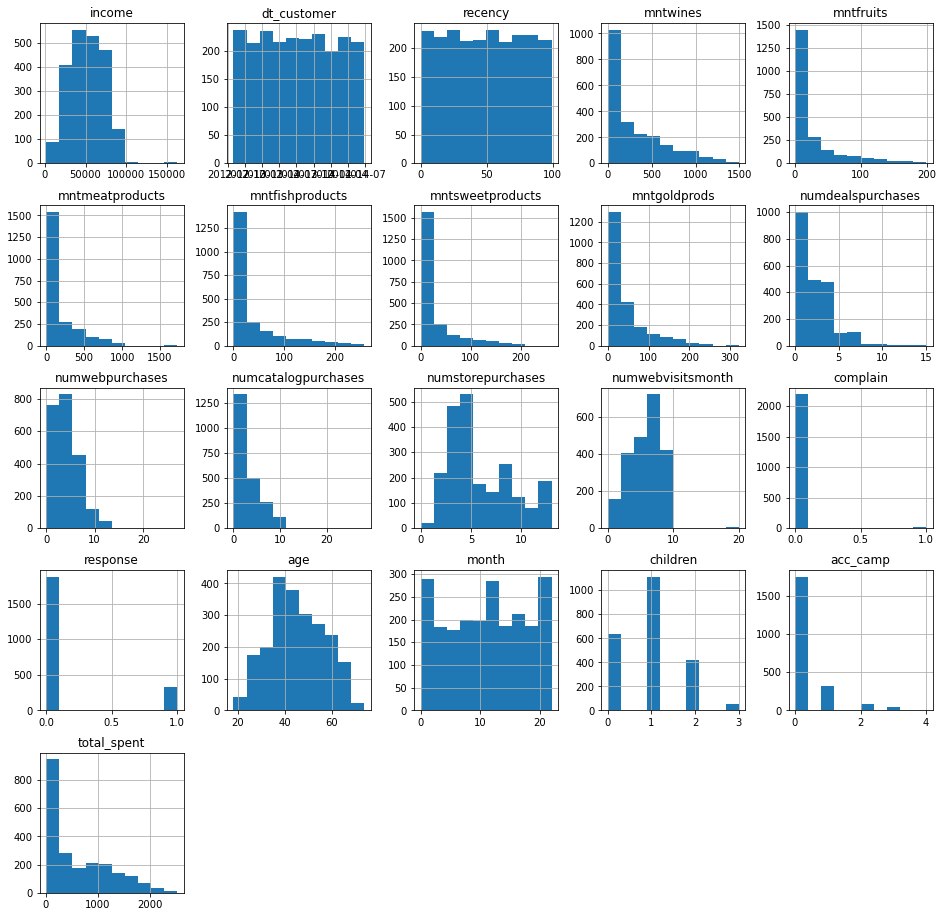

In [149]:
df.hist(figsize=(16,16))
plt.show()

## preprocessing for modeling

In [150]:
X = df

### encode categorical features

In [151]:
# dummify marital_status
# education ranking 1-3
# heatmap to show mean of each feature in the cluster

In [152]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

TypeError: Cannot cast DatetimeArray to dtype float64